In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tslearn as ts
sns.set_theme(style="whitegrid", font_scale=2, palette='Dark2')


In [30]:
data = pd.read_csv('holy_bible.txt', sep = ',', header=None)
data.columns= ['devices', 'throughput', 'probsucc', 'probfail']
data = data.groupby('devices').mean()

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/3887486618.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_throughput.pdf', bool=True)


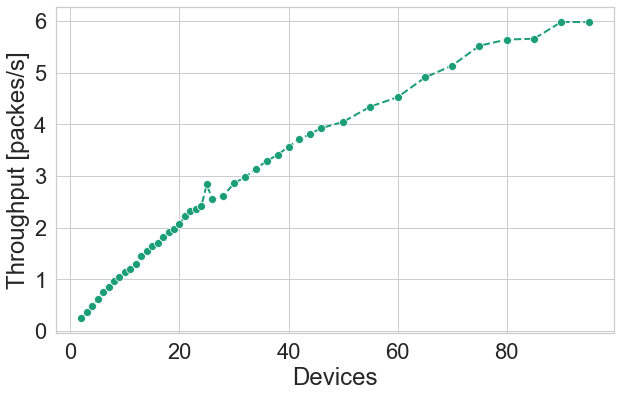

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=data, x='devices', y='throughput', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--')
ax.set_xlabel('Devices')
ax.set_ylabel('Throughput [packes/s]')
fig.savefig('lorawan_throughput.pdf', bool=True)

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/3039838493.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_prob.pdf', bool=True)


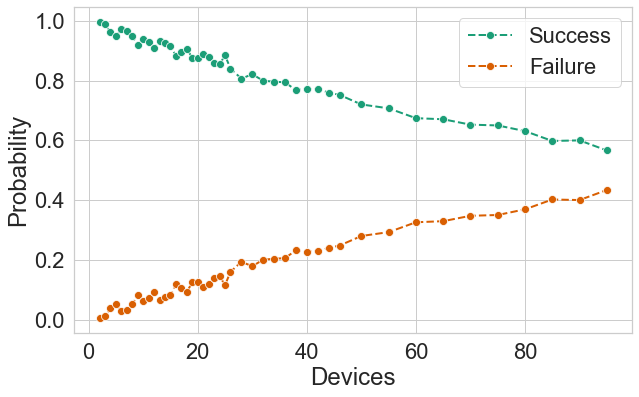

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=data, x='devices', y='probsucc', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Success')
sns.lineplot(data=data, x='devices', y='probfail', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Failure')
ax.set_xlabel('Devices')
ax.set_ylabel('Probability')
fig.savefig('lorawan_prob.pdf', bool=True)

In [34]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_60.0dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))


Text(0, 0.5, 'mean delay time')

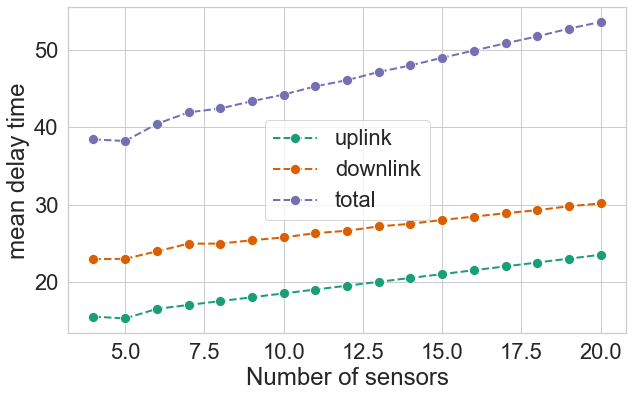

In [37]:
fig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')


/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/2794575061.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lena_delay.pdf', bool=True)


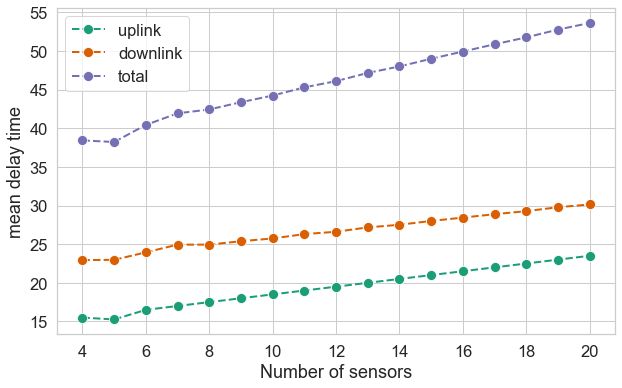

In [38]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []
sns.set_theme(style="whitegrid", font_scale=1.5, palette='Dark2')

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_0.500000dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))

ig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')
fig.savefig('lena_delay.pdf', bool=True)